In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from scipy import ndimage

x = np.linspace(0,2*np.pi,100)
sine = np.sin(x)

im = sine * sine[...,None]

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from scipy import ndimage

In [3]:
lenX=lenY=100
T = np.zeros((lenX, lenY))

# Set Boundary condition
T[(lenY-1):, :] = 100
T[:1, :] = 0
T[:, (lenX-1):] = 30
T[:, :1] = 0

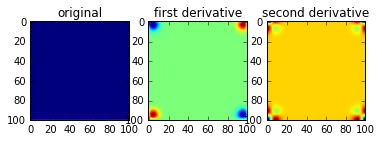

In [4]:
d1 = ndimage.gaussian_filter(T, sigma=5, order=1, mode='wrap')
d2 = ndimage.gaussian_filter(T, sigma=5, order=2, mode='wrap')


plt.figure()

plt.subplot(131)
plt.imshow(im)
plt.title('original')

plt.subplot(132)
plt.imshow(d1)
plt.title('first derivative')

plt.subplot(133)
plt.imshow(d2)
plt.title('second derivative')
plt.show()

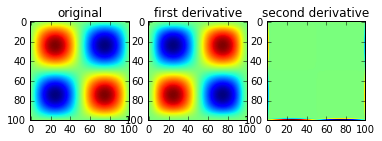

In [27]:
d1 = ndimage.laplace(im, mode='wrap')
#d2 = ndimage.laplace(d1, mode='wrap')
d1 = ndimage.gaussian_laplace(im, sigma=5, mode='wrap')


plt.figure()

plt.subplot(131)
plt.imshow(im)
plt.title('original')

plt.subplot(132)
plt.imshow(d1)
plt.title('first derivative')

plt.subplot(133)
plt.imshow(d2)
plt.title('second derivative')
plt.show()

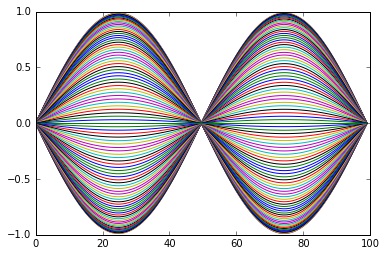

In [6]:
nx=100
ny=100
dy=5
dx=5
u=im
for i in range(1, nx-1):
        for j in range(1, ny-1):
            u[i,j] = ((u[i-1, j] + u[i+1, j])*dy**2 +
                      (u[i, j-1] + u[i, j+1])*dx**2)/(2.0*(dx**2 + dy**2))
plt.plot(u)

In [7]:
import numpy as np

x = np.zeros((100,100))

for i in range(0,100):
    for j in range(0,100):
        if i < 25 or i>75 or j<25 or j>75:
            x[i,j]=100

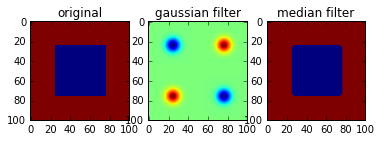

In [26]:
f_gaus = ndimage.gaussian_filter(x, sigma=5, order=1, mode='wrap')
f_med = ndimage.median_filter(x, 5)

plt.figure()
plt.subplot(131)
plt.imshow(x)
plt.title('original')

plt.subplot(132)
plt.imshow(f_gaus)
plt.title('gaussian filter')

plt.subplot(133)
plt.imshow(f_med)
plt.title('median filter')
plt.show()

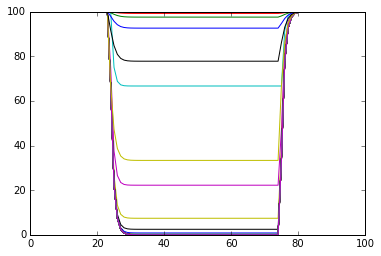

In [8]:
nx=100
ny=100
dy=5
dx=5
u=x
for i in range(1, nx-1):
        for j in range(1, ny-1):
            u[i,j] = ((u[i-1, j] + u[i+1, j])*dy**2 +
                      (u[i, j-1] + u[i, j+1])*dx**2)/(2.0*(dx**2 + dy**2))
plt.plot(u)

In [53]:
import numpy as np

x = np.zeros((100,100))

#for i in range(0,100):
 #   for j in range(0,100):
x[90,10]=100
x[80,90]=60
x[70,20]=80
x[60,80]=40
x[50,30]=50
x[40,70]=1
x[30,40]=2
x[20,60]=1
a=b=c=x


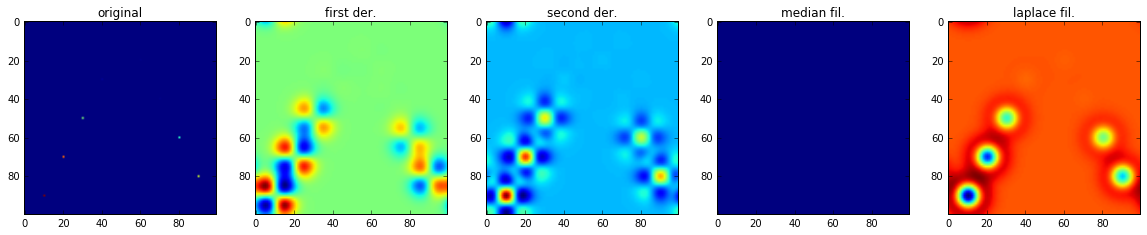

In [54]:
d1 = ndimage.gaussian_filter(x, sigma=5, order=1, mode='wrap')
d2 = ndimage.gaussian_filter(x, sigma=5, order=2, mode='wrap')
f_med = ndimage.median_filter(x, 5)
f_lap = ndimage.gaussian_laplace(x, sigma=5, mode='wrap')

plt.figure(figsize=(20, 20))
plt.subplot(151)
plt.imshow(y)
plt.title('original')

plt.subplot(152)
plt.imshow(d1)
plt.title('first der.')

plt.subplot(153)
plt.imshow(d2)
plt.title('second der.')

plt.subplot(154)
plt.imshow(f_med)
plt.title('median fil.')

plt.subplot(155)
plt.imshow(f_lap)
plt.title('laplace fil.')


plt.show()

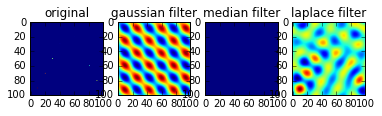

In [33]:
for i in range (1,50):
    f_gaus = ndimage.gaussian_filter(a, sigma=5, order=1, mode='wrap')
    f_med = ndimage.median_filter(b, 5)
    f_lap = ndimage.gaussian_laplace(c, sigma=5, mode='wrap')
    a=f_gaus
    b=f_med
    c=f_lap

plt.figure()
plt.subplot(141)
plt.imshow(y)
plt.title('original')

plt.subplot(142)
plt.imshow(f_gaus)
plt.title('gaussian filter')

plt.subplot(143)
plt.imshow(f_med)
plt.title('median filter')

plt.subplot(144)
plt.imshow(f_lap)
plt.title('laplace filter')

plt.show()

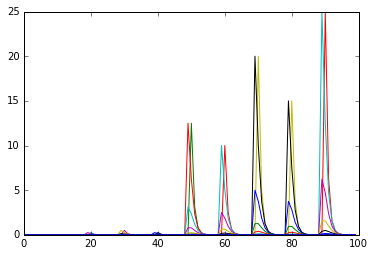

In [34]:
nx=100
ny=100
dy=5
dx=5
u=x
for i in range(1, nx-1):
        for j in range(1, ny-1):
            u[i,j] = ((u[i-1, j] + u[i+1, j])*dy**2 +
                      (u[i, j-1] + u[i, j+1])*dx**2)/(2.0*(dx**2 + dy**2))
plt.plot(u)

In [1]:
"""Finite difference solver 2D
==============================

This module provides a class Solver2D to solve a very simple equation
using finite differences with a center difference method in space and
Crank-Nicolson method in time.

You can use them with Ipython doing `run solver2d`.

This class can also be used to solve other 2D linear equations.

"""

import numpy as np
import matplotlib.pyplot as plt

plt.ion()

from operator2d import OperatorFiniteDiff2DPeriodic
from solver1d import Solver1D


class Solver2D(Solver1D):
    _Operator = OperatorFiniteDiff2DPeriodic

    def _init_field(self):
        oper = self.oper
        yy, xx = np.meshgrid(oper.ys-oper.Ly/2, oper.xs-oper.Lx/2)
        rr2 = xx**2 + yy**2
        self.s = np.exp(-100*rr2)

    def linear_operator(self):
        return (- self.U*self.oper.sparse_px
                + self.nu*(self.oper.sparse_pxx+self.oper.sparse_pyy))

    def _init_plot(self):
        oper = self.oper
        plt.figure()
        ax = plt.gca()
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_xlim([0, oper.Lx])
        ax.set_ylim([0, oper.Ly])
        self.ax = ax
        dx = oper.Lx/oper.nx
        dy = oper.Ly/oper.ny
        xs = np.linspace(-dx/2, oper.Lx+dx/2, oper.nx+1)
        ys = np.linspace(-dy/2, oper.Ly+dy/2, oper.ny+1)
        self.quad = ax.pcolormesh(xs, ys, self.s)
        plt.show()

    def _update_plot(self):
        self.quad.set_array(self.s.ravel())
        self.ax.figure.canvas.draw()

if __name__ == '__main__':
    dt = 0.01
    U = 1.
    Lx = 1.
    N = 200
    nu = 0.

    sim = Solver2D(dt, nu, U, [N, N], [Lx, Lx])
    sim.start(1)

ImportError: No module named 'operator2d'

/home/harison/miniconda3/envs/phy/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


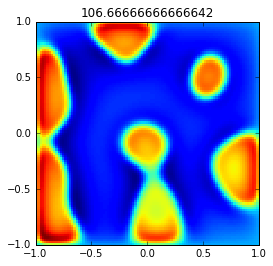

In [2]:
"""Pattern formation code

    Solves the pair of PDEs:
       u_t = D_1 \nabla^2 u + f(u,v)
       v_t = D_2 \nabla^2 v + g(u,v)
"""

import matplotlib
matplotlib.use('TkAgg')
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags,linalg,eye
from time import sleep

#Parameter values
Du=0.500; Dv=1;
delta=0.0045; tau1=0.02; tau2=0.2; alpha=0.899; beta=-0.91; gamma=-alpha;
#delta=0.0045; tau1=0.02; tau2=0.2; alpha=1.9; beta=-0.91; gamma=-alpha;
#delta=0.0045; tau1=2.02; tau2=0.; alpha=2.0; beta=-0.91; gamma=-alpha;
#delta=0.0021; tau1=3.5; tau2=0; alpha=0.899; beta=-0.91; gamma=-alpha;
#delta=0.0045; tau1=0.02; tau2=0.2; alpha=1.9; beta=-0.85; gamma=-alpha;
#delta=0.0001; tau1=0.02; tau2=0.2; alpha=0.899; beta=-0.91; gamma=-alpha;
#delta=0.0005; tau1=2.02; tau2=0.; alpha=2.0; beta=-0.91; gamma=-alpha; nx=150;

#Define the reaction functions
def f(u,v):
    return alpha*u*(1-tau1*v**2) + v*(1-tau2*u);

def g(u,v):
    return beta*v*(1+alpha*tau1/beta*u*v) + u*(gamma+tau2*v);


def five_pt_laplacian(m,a,b):
    """Construct a matrix that applies the 5-point laplacian discretization"""
    e=np.ones(m**2)
    e2=([0]+[1]*(m-1))*m
    h=(b-a)/(m+1)
    A=np.diag(-4*e,0)+np.diag(e2[1:],-1)+np.diag(e2[1:],1)+np.diag(e[m:],m)+np.diag(e[m:],-m)
    A/=h**2
    return A

def five_pt_laplacian_sparse(m,a,b):
    """Construct a sparse matrix that applies the 5-point laplacian discretization"""
    e=np.ones(m**2)
    e2=([1]*(m-1)+[0])*m
    e3=([0]+[1]*(m-1))*m
    h=(b-a)/(m+1)
    A=spdiags([-4*e,e2,e3,e,e],[0,-1,1,-m,m],m**2,m**2)
    A/=h**2
    return A

# Set up the grid
a=-1.; b=1.
m=100; h=(b-a)/m; 
x = np.linspace(-1,1,m)
y = np.linspace(-1,1,m)
Y,X = np.meshgrid(y,x)

# Initial data
u=np.random.randn(m,m)/2.;
v=np.random.randn(m,m)/2.;
plt.hold(False)
plt.pcolormesh(x,y,u)
plt.colorbar; plt.axis('image'); 
plt.draw()
u=u.reshape(-1)
v=v.reshape(-1)

A=five_pt_laplacian_sparse(m,-1.,1.);
II=eye(m*m,m*m)

t=0.
dt=h/delta/5.;
plt.ion()

#Now step forward in time
for k in range(120):
    #Simple (1st-order) operator splitting:
    u = linalg.spsolve(II-dt*delta*Du*A,u)
    v = linalg.spsolve(II-dt*delta*Dv*A,v)

    unew=u+dt*f(u,v);
    v   =v+dt*g(u,v);
    u=unew;
    t=t+dt;

    #Plot every 3rd frame
    if k/3==float(k)/3:
        U=u.reshape((m,m))
        plt.pcolormesh(x,y,U)
        plt.colorbar
        plt.axis('image')
        plt.title(str(t))
        plt.draw()

plt.ioff()

-0.999999999343 -0.414213562373
-0.999999967676 -0.3801190698
-0.999999874343 -0.301378871104
-0.999999839343 -0.277522334748


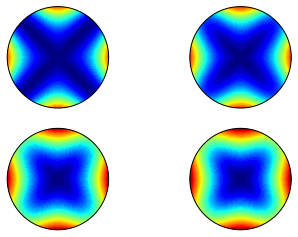

In [11]:
def dispersion_relation_2D(p, theta, C):
    arg = C*sqrt(sin(p*cos(theta))**2 +sin(p*sin(theta))**2)
    c_frac = 2./(C*p)*arcsin(arg)
    return c_frac

import numpy as np
from numpy import cos, sin, arcsin, sqrt, pi # for nicer math formulas
r = p = np.linspace(0.001, pi/2, 101)
theta = np.linspace(0, 2*pi, 51)
r, theta = np.meshgrid(r, theta)
# Make 2x2 filled contour plots for 4 values of C

import matplotlib.pyplot as plt
C_max = 1/sqrt(2)
C = [[C_max, 0.9*C_max], [0.5*C_max, 0.2*C_max]]
fix, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True))

for row in range(2):
    for column in range(2):
        error = 1 - dispersion_relation_2D (p, theta, C[row][column])
        print (error.min(), error.max())
        
        # use vmin=error.min(), vmax=error.max()
        cax = axes[row][column].contourf(
        theta, r, error, 50, vmin=-1, vmax=-0.28)
        axes[row][column].set_xticks([])
        axes[row][column].set_yticks([])
# Add colorbar to the last plot
#cbar = plt.colorbar(cax)
#cbar.ax.set_ylabel(’error in wave velocity’)
#plt.savefig(’disprel2D.png’)
#plt.savefig(’disprel2D.pdf’)
plt.show()